## EDA for the Titanic Data Set

In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

In [2]:
# Load & display the data from Titanic.csv
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# count the number of missing values
df_missing_count = df.isnull().sum()
df_missing_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# another way to determine the number of non-null values & data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can confirm above that 'Age' and 'Cabin' have a significant proportion of missing data. Moreover, we can also see that most of our data are in the form of float64 and int64, and only a few object (strings).

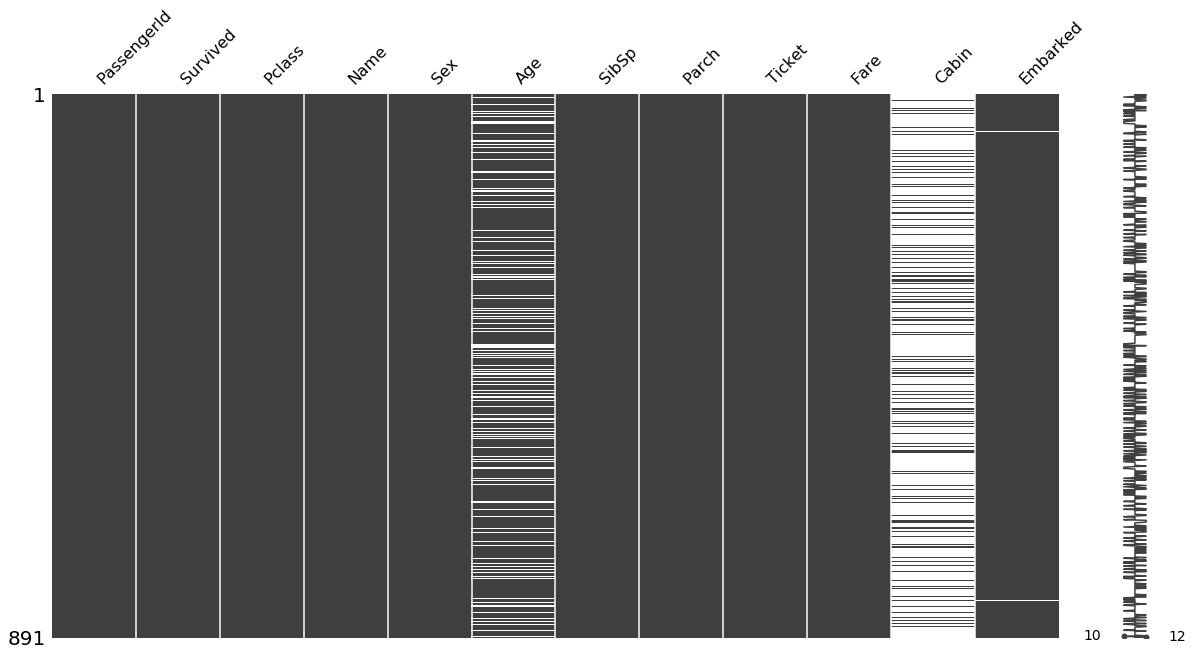

In [5]:
# plot matrix graph of missing values with missingno
missingno.matrix(df, figsize = (20,10))

We can determine from the missing value counts & missingno matrix plot above that only two columns ('Age' and 'Cabin') have a significant number of missing values (177 for 'Age' & 687 for 'Cabin'). The missing data may be considered as belonging to the category of Missing Completely At Random (MCAR), therefore we can consider dropping these two columns. However, we'll first examine if 'Cabin' data can be inferred from other data. For example, whether it is correlated to 'Pclass' ...

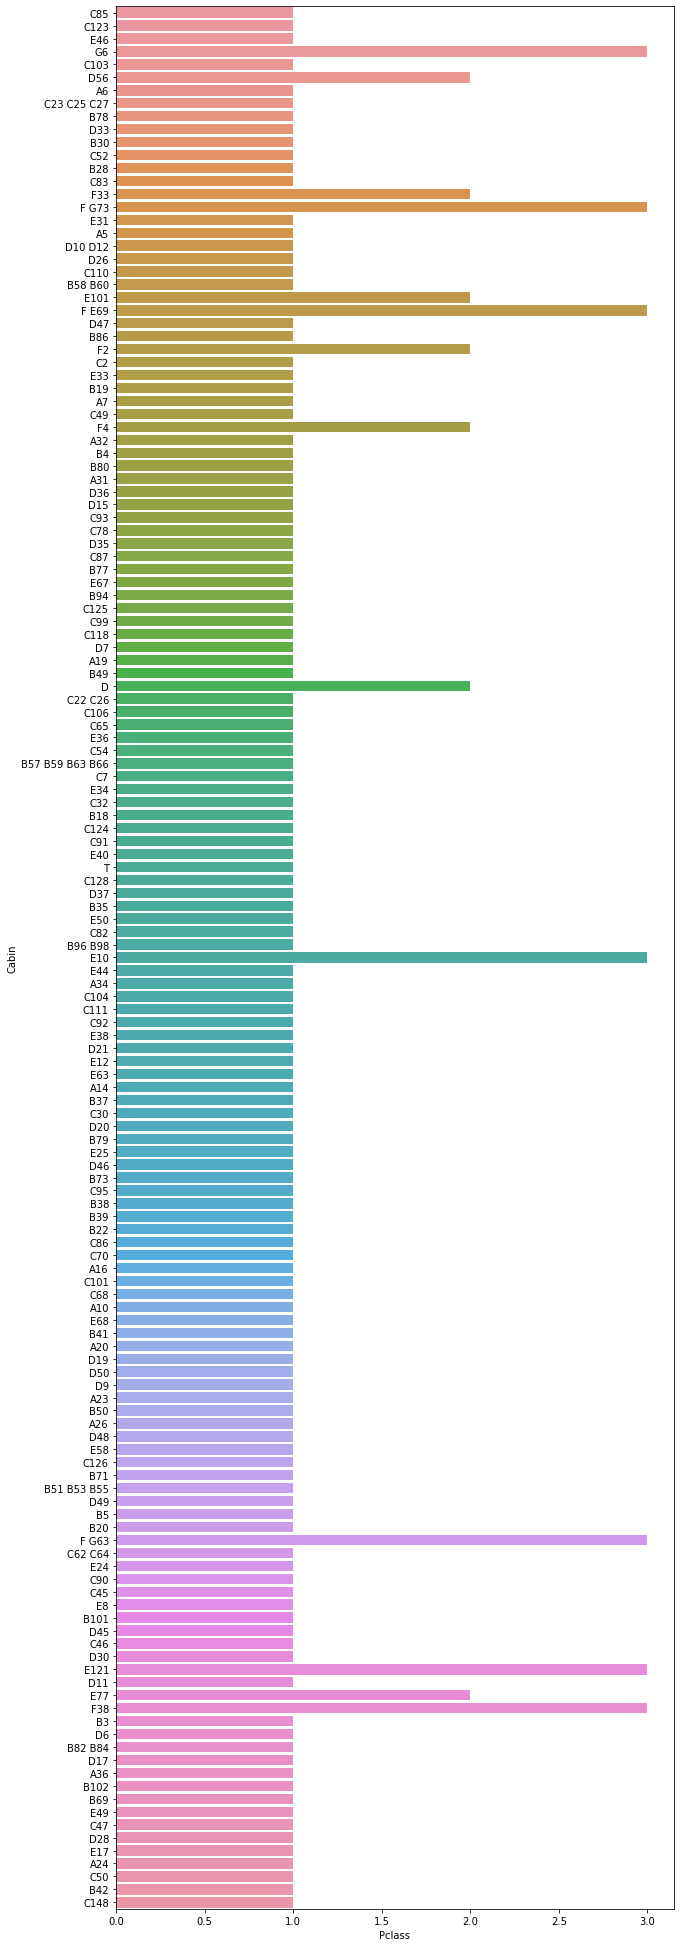

In [6]:
fig = plt.figure(figsize=(10,35))
sns.barplot(data = df, y = df['Cabin'], x = df['Pclass'])

From the bar graph above, it is obvious that most of the available cabin data belong to passenger class 1 (Pclass = 1). Therefore, the available cabin data is not representative and is not useful for later analyses. Therefore, the 'Cabin' column will be dropped.

Now, we'll see if we can infer age from other data. The number of parents or children aboard the ship (Parch) may be related to age, since older people may bring their family along. However, from the graphs below, we can see that there are no clear relationships between Parch and Age. Therefore, the 'Age' column will be dropped as well.

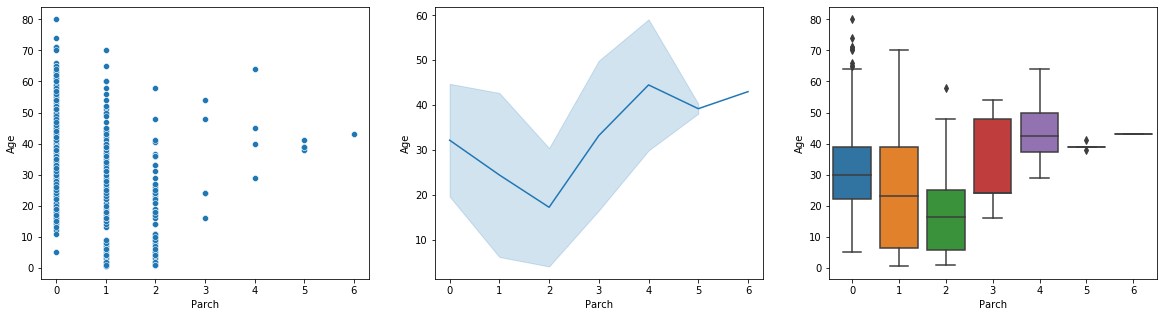

In [7]:
figure,axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(data = df, x = df['Parch'], y = df['Age'], ax = axes[0])

sns.lineplot(data = df, x = df['Parch'], y = df['Age'], errorbar = 'sd', ax = axes[1])

sns.boxplot(x = df['Parch'], y = df['Age'], ax = axes[2])

We can now examine if there are any other columns that can be dropped to make our analyses later much simpler. One column that may be dropped is 'Fare'. From the graphs below, we can see that there's a relationship between 'Fare' and passenger class ('Pclass'). This is expected since 1st class pessengers (Pclass = 1) tend to pay more for their tickets. Therefore, the 'Fare' column will be dropped as well to simplify our analyses later on.

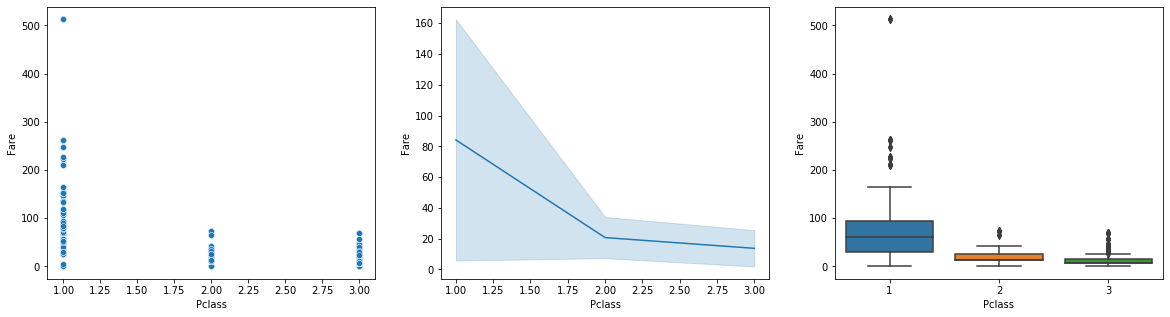

In [8]:
figure,axes = plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(data=df,x = df['Pclass'],y = df['Fare'], ax = axes[0])

sns.lineplot(data = df, x = df['Pclass'],y = df['Fare'], errorbar = 'sd', ax = axes[1])

sns.boxplot(x = df['Pclass'],y = df['Fare'], ax = axes[2])

Other columns that can be dropped include 'PassengerId', 'Name', and 'Ticket' since the number of unique values within these columns were too large (not very useful for grouping) and they are not likely to be useful in determining the factors that influenced survival.

In [9]:
df_drop = df.drop(['PassengerId','Name','Age','Cabin','Ticket','Fare'],axis = 1)
df_drop

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


One way of dealing with non-numeric categorical data is to convert them into dummy numerical values. For example, in the 'Survived' column,  0 = did not survive, while 1 = survived. Therefore, data in 'Sex' and 'Embarked' columns were converted to dummy numeric values as well.

In [10]:
df_drop['Sex'].replace('male',0,inplace=True)
df_drop['Sex'].replace('female',1,inplace=True)

df_drop['Embarked'].replace('C',0,inplace=True)
df_drop['Embarked'].replace('Q',1,inplace=True)
df_drop['Embarked'].replace('S',2,inplace=True)

df_drop

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,0,1,0,2.0
1,1,1,1,1,0,0.0
2,1,3,1,0,0,2.0
3,1,1,1,1,0,2.0
4,0,3,0,0,0,2.0
...,...,...,...,...,...,...
886,0,2,0,0,0,2.0
887,1,1,1,0,0,2.0
888,0,3,1,1,2,2.0
889,1,1,0,0,0,0.0


Now, to visualise the relationships among these factors at a glance, a scatterplot matrix was created. The colours reflect whether the passengers survived or not: 0 = did not survive (blue), 1 = survived (orange)

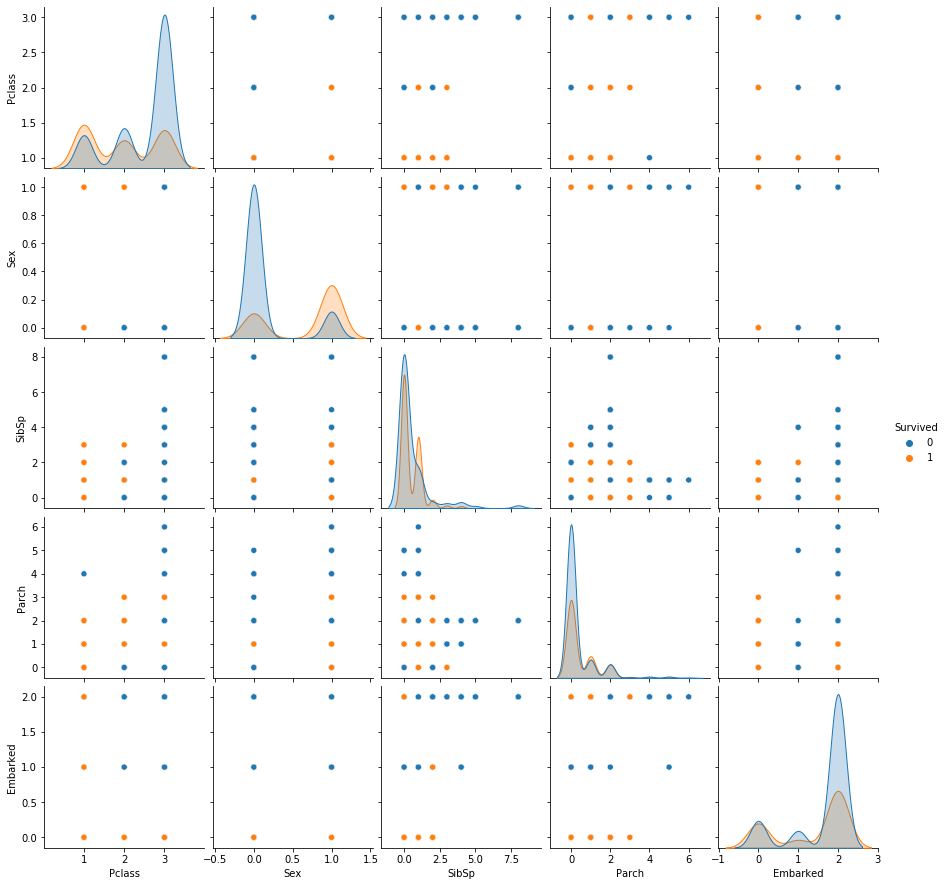

In [11]:
sns.pairplot(df_drop, hue = 'Survived')

Several interesting observations jumped out from the scatterplot matrix above:

- Firstly, looking at the distribution plots along the diagonal of the scatterplot matrix, it is clear that there were more people who did not survive among the 3rd class passengers (Pclass = 3) (row 1, column 1). 
- Secondly, if we look at Sex (row 2, column 2), there were more men (Sex = 0) who did not survive compared to women (Sex = 1).
- Thirdly, if we look at the number of siblings and/or spouses aboard the ship (SibSp) (row 3, column 3), it seemed that passengers who had 1 sibling / spouse (SibSp = 1) had a somewhat higher chance of surviving (as indicated by the 2nd orange peak). However, the differences were barely noticable.
- In a similar vein, passengers who did not have any parents or children aboard the ship (Parch = 0) had a slightly worse chance of surviving compared to those who did (row 4, column 4). Again, the differences here were not very obvious.
- Lastly, in row 5, column 5, more passengers who embarked the Titanic in Southampton (S, Embarked = 2) did not survive, compared to passengers who boarded the Titanic from other ports.

What is the most important factor in determining survival of the Titanic incident?
- The passenger class (Pclass) seems to be the most important factor in determining passengers' survival.

In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- Yes, the upper-class passengers (Pclass = 1) seemed to have a better chance of survival from this dataset.

We can visualise this observation another way by plotting the mean survival rates among passengers from the different classes. From the table and bar graph below, we can conclude that the average survival rate was better for 1st class passengers (0.63) compared to 2nd class (0.47), or 3rd class passengers (0.24).

In [12]:
groupby_Pclass = pd.DataFrame(df.groupby(by = ['Pclass']).mean())
groupby_Pclass['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

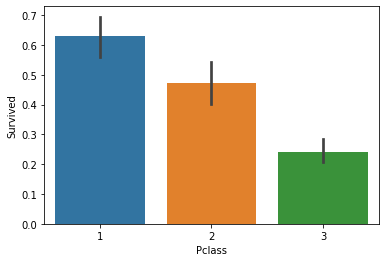

In [13]:
sns.barplot(data = df, x = df['Pclass'], y = df['Survived'])

“Women and children first”. Was this the case?
- From this dataset, it is obvious that women tend to have a better chance for survival
- As for children, we can't tell since we have dropped the 'Age' column earlier due to the high number of missing data (see below)

From the calculations and bar plots below, it is obvious that women had a significantly greater survival rate (0.74) compared to men (0.19).

In [14]:
groupby_Sex = pd.DataFrame(df.groupby(by = ['Sex']).mean())
groupby_Sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

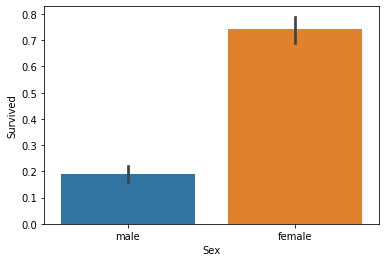

In [15]:
sns.barplot(data = df, x = df['Sex'], y = df['Survived'])

From the scatterplot matrix above, it's not clear from Parch data if people with parents/children had a higher survival rates. To answer the question of whether children were prioritised, we'll plot age vs survival rate. This may give us an insight even though the Age data is incomplete. First, we'll categories passengers in different age groups ...

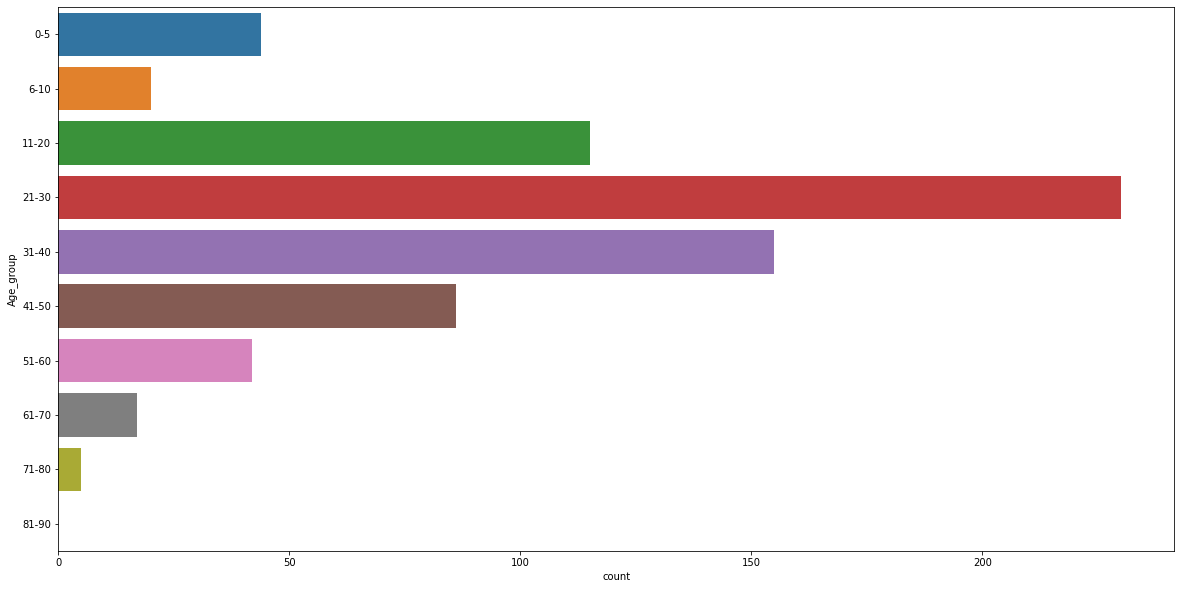

In [16]:
df['Age_group'] = pd.cut(df['Age'], [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90], 
                   labels=['0-5','6-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','71-80', '81-90'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y = df['Age_group'], data = df)

It seems that there were more data for passengers in the younger age groups (< 50) in this dataset. Most of the passengers were in the 21 - 30 yearl old bin. There were also children below the age of 11 (0 - 5 and 6 - 10 year-old bins) although the numbers were small.

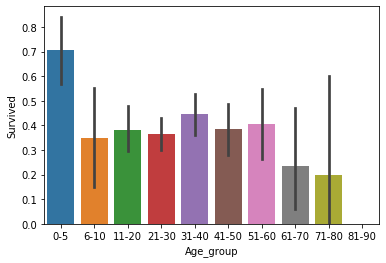

In [17]:
sns.barplot(data = df, x = df['Age_group'], y = df['Survived'])

From the bar plot above, it seems that young infants in the 0 - 5 year-old bin had a better overall chance of survival (~ 0.7) compared to any other age groups. So perhaps, only toddlers and young infants were prioritised. However, older children from 6 - 10 year old did not have a better chance of survival compared to any other age groups.

Add one other observation that you have noted in the dataset.
- it was noted above that there were more passengers who did not survived who boarded the ship in Southampton (Embarked = S). Inspecting the bar plot below, we can see that S is associated with a lower average survival rate (although it's somewhat compareable to Q). The reason for this is not clear. This is probably because Southampton was the first port where passengers could go aboard the Titanic.

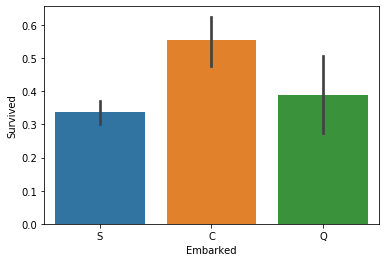

In [18]:
sns.barplot(data = df, x = df['Embarked'], y = df['Survived'])